In [1]:
from pathlib import Path
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import torchvision


In [2]:
files=list(Path(r"/Users/damian/Downloads/ds000030_just_brain/").glob("*"))

In [13]:
#images=[nib.load(file).get_fdata() for file in files]


KeyboardInterrupt



In [4]:
#stack = np.stack(images)

In [5]:
#print(stack.min())
#print(stack.max())
#minimum and maximum values for normalization


In [6]:
def normalize_image(im):
    im = im / 216

In [3]:
data=nib.load(files[0]).get_fdata()

In [4]:
data.shape

(256, 256, 256)

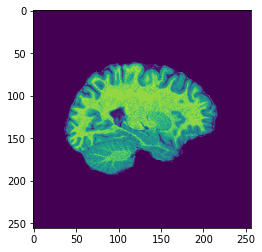

In [5]:
plt.imshow(data[150])

In [36]:
data.min()
data.max()

179.0

In [6]:
import torch
from torchsummary import summary
import numpy as np

In [7]:
from MedicalNet.models.resnet import resnet152

In [8]:
weights_file = r"/Users/damian/Downloads/MedicalNet_pytorch_files2/pretrain/resnet_152.pth"

In [9]:
model = resnet152(sample_input_D=256, sample_input_H=256, sample_input_W=256, num_seg_classes=2)

/Users/damian/BrainHack/MedicalNet/models/resnet.py:173: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  m.weight = nn.init.kaiming_normal(m.weight, mode='fan_out')


In [10]:
modstr = lambda k: str(k).replace("module.", "")

In [11]:
module_str_rem = lambda k: str(k).replace("module.", "")
net_dict = model.state_dict() 
pretrain = torch.load(weights_file, map_location=torch.device('cpu'))
pretrain_dict = {modstr(k): v for k, v in pretrain['state_dict'].items()}
net_dict.update(pretrain_dict)
model.load_state_dict(net_dict)

<All keys matched successfully>

In [12]:
newmodel = list(model.children())[:8]
classifier = [torch.nn.AdaptiveMaxPool3d(4), torch.nn.Flatten(), torch.nn.Linear(131072, 4), torch.nn.Sigmoid()] 
newmodel.extend(classifier)

In [13]:
model = torch.nn.Sequential(*newmodel)

In [14]:
#newnewmodel.float()
#summary(newnewmodel,(1,256,256,256))

In [15]:
data.shape

(256, 256, 256)

In [16]:
model.float()
ret = model(torch.tensor([np.expand_dims(data, axis =0)]).float())

/var/folders/xw/1yw1mlg54gd49g34q6hd8sxw0000gn/T/ipykernel_11934/3173324667.py:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /Users/distiller/project/pytorch/torch/csrc/utils/tensor_new.cpp:210.)
  ret = model(torch.tensor([np.expand_dims(data, axis =0)]).float())


In [17]:
ret.shape

torch.Size([1, 4])

In [18]:
ret.detach().numpy()

array([[0.15781745, 0.73544836, 0.5068096 , 0.80262494]], dtype=float32)